In [1]:
# Power Spectrum plot
import matplotlib.pyplot as plt
import numpy as np
import powerbox as pbox
from Functions import *
from mpl_toolkits import mplot3d
from powerbox import get_power
from scipy import stats
import statistics
import pandas as pd

# Redshift = 0 
snapshot_used = 250 # z = 0
gals, sim_props, snaplist = get_gal_catalogue(snapshot_used)
gals1, sim_props, snaplist = get_gal_catalogue(snapshot_used)

# See other available Snaps and Redshifts
reds = snaplist[1]
snaps = snaplist[0]

snaplist_index_used = list(snaplist[0]).index(snapshot_used)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = str(round(redshift_used, 1)) # round float to nearest whole int
gals.columns #returns all avaiable properties of galxies

Index(['HaloID', 'ID', 'Type', 'CentralGal', 'GhostFlag', 'Len', 'MaxLen',
       'Spin', 'Mvir', 'Rvir', 'Vvir', 'Vmax', 'FOFMvir', 'HotGas',
       'MetalsHotGas', 'ColdGas', 'MetalsColdGas', 'H2Frac', 'H2Mass',
       'HIMass', 'Mcool', 'DiskScaleLength', 'StellarMass', 'GrossStellarMass',
       'MetalsStellarMass', 'Sfr', 'EjectedGas', 'MetalsEjectedGas',
       'BlackHoleMass', 'Rcool', 'Cos_Inc', 'MergTime', 'MergerStartRadius',
       'BaryonFracModifier', 'FOFMvirModifier', 'MvirCrit', 'MergerBurstMass',
       'MWMSA', 'Fesc', 'FescWeightedGSM', 'FescBH', 'BHemissivity',
       'EffectiveBHM', 'BlackHoleAccretedHotMass', 'BlackHoleAccretedColdMass',
       'dt', 'Pos_0', 'Pos_1', 'Pos_2', 'Vel_0', 'Vel_1', 'Vel_2',
       'NewStars_0', 'NewStars_1', 'NewStars_2', 'NewStars_3', 'NewStars_4'],
      dtype='object')

In [2]:
# M VIR
gals = gals[gals.Mvir != 0] # remove all MVir = 0 rows from gals (NONE REMOVED)
Mvir = gals["Mvir"]*1e10#convert into correct units
# HI MASS
gals1 = gals1[gals1.HIMass != 0]# remove all HIMass = 0 rows from gals 
HIMass = gals1["HIMass"]*1e10#convert into correct units

In [3]:
# NORMAL GALAXY POSITIONS for GAL and MVIR array (no 0 values found in gals for MVir)
pos_x = gals["Pos_0"]
pos_y = gals["Pos_1"]
pos_z = gals["Pos_2"]
Pos = np.array([pos_x, pos_y, pos_z])
Pos.T.shape
Pos_new=Pos.T # Transpose the Pos so it is in format (N,D) array
Pos_new.shape
# HI GALAXY POSITIONS
pos_x1 = gals1["Pos_0"]
pos_y1 = gals1["Pos_1"]
pos_z1 = gals1["Pos_2"]
Pos1 = np.array([pos_x1, pos_y1, pos_z1])
Pos1.T.shape
Pos_new1=Pos1.T # Transpose the Pos so it is in format (N,D) array
Pos_new1.shape

(1640350, 3)

In [4]:
# getting bits ready for 3D grid 
boxsize = 178.57142857142858 # get the box size, this is from sims pops 
dim = len(Pos) # number of dimensions in 3D space =3
boxlength = [boxsize] * dim #get box length for each side of box
N = pos_x.shape # = 1648367
V = np.product(boxlength)
nbins=179 # define the number of bins for our 3D grid

In [5]:
Pos_new.shape,Mvir.shape,Pos_new1.shape,HIMass.shape

((1648367, 3), (1648367,), (1640350, 3), (1640350,))

In [6]:
# Get 3D density grids
rhox, edges = np.histogramdd(Pos_new, bins=nbins)  # calculate the 3D grid using histogramdd
rhomvir, edgesmvir = np.histogramdd(Pos_new, bins=nbins, weights=Mvir)  # calculate the 3D grid using histogramdd
rhohimass, edgeshimass = np.histogramdd(Pos_new1, bins=nbins, weights=HIMass)  # calculate the 3D grid using histogramdd


In [7]:
# Get overdensity
delta = rhox / np.mean(rhox) - 1 
deltamvir = rhomvir / np.mean(rhomvir) - 1 
deltahimass = rhohimass / np.mean(rhohimass) - 1 
# get power spectrum
gal_ps, gal_k = get_power(delta,boxlength,remove_shotnoise=False)
mvir_ps, mvir_k = get_power(deltamvir,boxlength,remove_shotnoise=False)
himass_ps, himass_k = get_power(deltahimass,boxlength,remove_shotnoise=False)

In [8]:
# N sets the number of k values (we want to go up to 10)
N_input = 300
gal_ps1, gal_k1 = pbox.get_power(Pos_new,boxlength,bins=100,N=N_input,remove_shotnoise=False)# NO WEIGHTS for GALAXY PS
mvir_ps1, mvir_k1 = pbox.get_power(Pos_new,boxlength,bins=100,N=N_input,remove_shotnoise=False, weights=Mvir)# NO WEIGHTS for GALAXY PS
himass_ps1, himass_k1 = pbox.get_power(Pos_new1,boxlength,bins=100,N=N_input,remove_shotnoise=False, weights=HIMass)# NO WEIGHTS for GALAXY PS


In [9]:
gal_k1

array([0.07005907, 0.14791319, 0.23301967, 0.32335542, 0.41383499,
       0.50440954, 0.5964865 , 0.68761436, 0.77887349, 0.86971355,
       0.96047659, 1.05227385, 1.14391276, 1.23521605, 1.32659759,
       1.41786262, 1.50943276, 1.60080713, 1.69196462, 1.78324471,
       1.87436796, 1.96577114, 2.05755746, 2.14892298, 2.24004995,
       2.33165852, 2.42303267, 2.51436401, 2.6059662 , 2.69739016,
       2.78877947, 2.88003815, 2.97148779, 3.0630009 , 3.15426652,
       3.2456368 , 3.33694164, 3.42834144, 3.51994494, 3.61125783,
       3.70265284, 3.7940678 , 3.88527183, 3.97680092, 4.06829932,
       4.15964164, 4.25114514, 4.34258439, 4.43394006, 4.52539472,
       4.6169263 , 4.7082159 , 4.79942123, 4.8908688 , 4.98227449,
       5.07375778, 5.16530689, 5.25660185, 5.34763442, 5.43906381,
       5.53048937, 5.62190059, 5.71327959, 5.80458836, 5.89599419,
       5.98743244, 6.07882051, 6.17020004, 6.2615652 , 6.35304447,
       6.44455887, 6.53587467, 6.62716239, 6.71846327, 6.80982

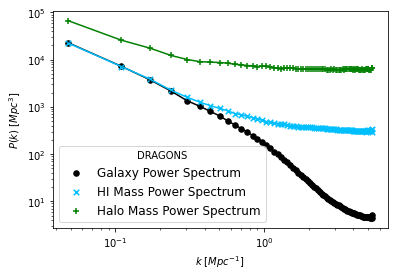

In [10]:
# plot PS
fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
# Labels and Legends
label_galsPS = ("Galaxy Power Spectrum")
label_himassPS = ("HI Mass Power Spectrum")
label_mvirPS = ("Halo Mass Power Spectrum")
# Plot
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P(k)$ $[Mpc^{3}]$")
plt.xscale('log')
plt.yscale('log')
ax.plot(gal_k,gal_ps,color="black")
ax.scatter(gal_k,gal_ps,color="black", label=label_galsPS, marker="o",s=30)
ax.plot(himass_k,himass_ps,color="deepskyblue")
ax.scatter(himass_k,himass_ps,color="deepskyblue", label=label_himassPS,marker="x",s=30)
ax.plot(mvir_k,mvir_ps,color="green")
ax.scatter(mvir_k,mvir_ps,color="green", label=label_mvirPS, marker="+", s=30)

plt.legend(title=("DRAGONS"),
           loc='lower left',
           fontsize=12)
# Name and save plot
nbins = str(nbins)
name_of_plot=("PowerSpectrum_GALS_and_HIMass_Mvir_logged_TEST" + nbins)
plt.savefig("plots/" + name_of_plot + ".pdf")

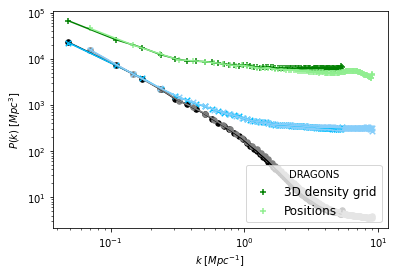

In [11]:
# plot PS
fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
# Labels and Legends
label_galsPS = ("Galaxy Power Spectrum")
label_himassPS = ("HI Mass Power Spectrum")
label_mvirPS = ("Halo Mass Power Spectrum")
labelpowerbox = ("Positions")
labelhist = ("3D density grid")
# Plot
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P(k)$ $[Mpc^{3}]$")
plt.xscale('log')
plt.yscale('log')
ax.plot(gal_k,gal_ps,color="black")
ax.scatter(gal_k,gal_ps,color="black", marker="o",s=30)
ax.plot(himass_k,himass_ps,color="deepskyblue")
ax.scatter(himass_k,himass_ps,color="deepskyblue",marker="x",s=30)
ax.plot(mvir_k,mvir_ps,color="green")
ax.scatter(mvir_k,mvir_ps,color="green", label=labelhist, marker="+", s=30)

ax.plot(gal_k1,gal_ps1,color="grey")
ax.scatter(gal_k1,gal_ps1,color="grey", marker="o",s=30)
ax.plot(himass_k1,himass_ps1,color="lightskyblue")
ax.scatter(himass_k1,himass_ps1,color="lightskyblue",marker="x",s=30)
ax.plot(mvir_k1,mvir_ps1,color="lightgreen")
ax.scatter(mvir_k1,mvir_ps1,color="lightgreen", label=labelpowerbox, marker="+", s=30)


plt.legend(title=("DRAGONS"),
           loc='lower right',
           fontsize=12)
# Name and save plot
nbins = str(nbins)
name_of_plot=("PowerSpectrum_GALS_and_HIMass_Mvir_logged_BOTH" + nbins)
plt.savefig("plots/" + name_of_plot + ".pdf")

# ADD CENTRALS

In [12]:
# Add centrals
Type = gals["Type"]
Cen_gals = gals[Type==0]
nbins=179
Cen_pos_x, Cen_pos_y, Cen_pos_z, Cen_Pos, Cen_Pos_new = return_3d_pos(Cen_gals)
Cen_rhox, Cen_edges = np.histogramdd(Cen_Pos_new, bins=nbins)
Cen_delta = Cen_rhox / np.mean(Cen_rhox) - 1 # calcualte the over density
Cen_gal_ps, Cen_gal_k = get_power(Cen_delta,boxlength,remove_shotnoise=False,weights=None)# NO WEIGHTS for GALAXY PS
Cen_gal_ps_pos, Cen_gal_k_pos = get_power(Cen_Pos_new,boxlength,bins=nbins,N=200,remove_shotnoise=False)# NO WEIGHTS for GALAXY PS


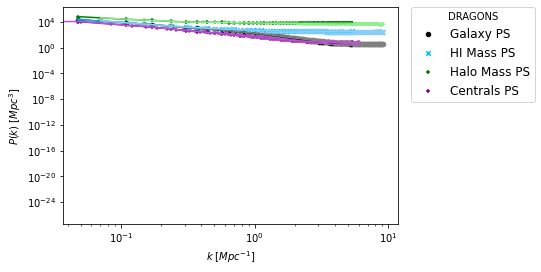

In [13]:
# plot PS
fig, ax = plt.subplots(1, 1)
label_z = ("z = " + redshift_used)
# HISTOGRAMS
label_galsPS = ("Galaxy PS")
label_himassPS = ("HI Mass PS")
label_mvirPS = ("Halo Mass PS")
label_Cen = ("Centrals PS")
# POSITIONS
label_galsPS_pos = ("Galaxy PS")
label_himassPS_pos = ("HI Mass PS")
label_mvirPS_pos = ("Halo Mass PS")
label_Cen_pos = ("Centrals PS")
# Plot
ax.set_xlabel(r"$k$ $[Mpc^{-1}]$")
ax.set_ylabel(r"$P(k)$ $[Mpc^{3}]$")
plt.xscale('log')
plt.yscale('log')

# From density grid
ax.plot(gal_k,gal_ps,color="black")
ax.scatter(gal_k,gal_ps,color="black", label=label_galsPS, marker="o",s=20)
ax.plot(himass_k,himass_ps,color="deepskyblue")
ax.scatter(himass_k,himass_ps,color="deepskyblue", label=label_himassPS,marker="x",s=20)
ax.plot(mvir_k,mvir_ps,color="green")
ax.scatter(mvir_k,mvir_ps,color="green", label=label_mvirPS, marker="+", s=20)
ax.plot(Cen_gal_k,Cen_gal_ps,color="darkmagenta")
ax.scatter(Cen_gal_k,Cen_gal_ps,color="darkmagenta", label=label_Cen, marker="+", s=20)

# from positions
ax.plot(gal_k1,gal_ps1,color="grey")
ax.scatter(gal_k1,gal_ps1,color="grey", marker="o",s=20)
ax.plot(himass_k1,himass_ps1,color="lightskyblue")
ax.scatter(himass_k1,himass_ps1,color="lightskyblue",marker="x",s=20)
ax.plot(mvir_k1,mvir_ps1,color="lightgreen")
ax.scatter(mvir_k1,mvir_ps1,color="lightgreen", marker="+", s=20)
ax.plot(Cen_gal_k_pos,Cen_gal_ps_pos,color="mediumorchid")
ax.scatter(Cen_gal_k_pos,Cen_gal_ps_pos,color="mediumorchid", marker="+", s=20)

plt.legend(title=("DRAGONS"),
           fontsize=12,
           bbox_to_anchor=(1.04,1), 
           loc="upper left", 
           borderaxespad=0)

# Name and save plot
nbins = str(nbins)
name_of_plot=("PowerSpectrum_GALS_and_HIMass_Mvir_logged_TEST" + nbins)
plt.savefig("plots/" + name_of_plot + ".pdf")